In [9]:
# import python libraries
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm
import matplotlib.patheffects as PathEffects

In [10]:
# load daily close price data
df = pd.read_csv('../../github-bitcoin-scripts/bitcoin-data/bitcoin-daily-data.csv')
orig_dates = df['date'].to_list()
orig_prices = df['price'].to_list()
df.tail(5)

,date,price
4817,3/13/22,38780.73
4818,3/14/22,38875.90
4819,3/15/22,40415.53
4820,3/16/22,40969.20
4821,3/17/22,40552.74


In [30]:
hodl_days = [l+1 for l in list(range(1826))]
# $1 worth of sats at each day
inverse_prices = [1/p if p>0 else 0 for p in orig_prices]

for d in hodl_days:
    hodl_return = []
    for i in range(len(orig_prices)):
        i_price = orig_prices[i]
        if i_price > 0:
            try:
                f_price = orig_prices[i+d]
                sats_stacked = sum(inverse_prices[i:i+d+1])
                hodl_return.append((sats_stacked*f_price-(d+1))/(d+1)*100)
            except:
                hodl_return.append(-100)
        else:
            hodl_return.append(0)
    df['%i_day_return' % d] = hodl_return

In [31]:
def str_to_datetime(strs):
    """Convert a list of "YYYY-MM-DD" strings to datetime objects."""
    dates = []
    for date in strs:
        if '-' in date:
            y, m, d = (int(x) for x in date.split("-"))
        elif '/' in date:
            m, d, y = int(date.split('/')[0]), int(date.split('/')[1]), \
            int(date.split('/')[2])+2000
        date = datetime.datetime(y, m, d)
        dates.append(date)
    return dates

datetimes = str_to_datetime(orig_dates)
dates = [mdates.date2num(date) for date in datetimes]

In [32]:
def x_axis_dates(ax=None, fig=None):
    """Helper function to format the x axis as dates.

    Input:
    ax:  An Axes instance or an iterable of Axes instances.
    Optional, defaults to plt.gca()
    fig: The Figure instance containing those Axes or Axeses
    Optional, defaults to plt.gcf()
    """
    if ax is None: ax = plt.gca()
    if fig is None: fig = plt.gcf()
    loc = mdates.AutoDateLocator()
    fmt = mdates.AutoDateFormatter(loc)
    try:
        ax.xaxis.set_major_locator(loc)
        ax.xaxis.set_major_formatter(fmt)
    except AttributeError:
        for a in ax:
            # Fresh locators/formatters are needed for each instance
            loc = mdates.AutoDateLocator()
            fmt = mdates.AutoDateFormatter(loc)
            a.xaxis.set_major_locator(loc)
            a.xaxis.set_major_formatter(fmt)
    fig.autofmt_xdate()

In [33]:
df.sample(10)

,date,price,1_day_return,2_day_return,3_day_return,4_day_return,5_day_return,6_day_return,7_day_return,8_day_return,...,1817_day_return,1818_day_return,1819_day_return,1820_day_return,1821_day_return,1822_day_return,1823_day_return,1824_day_return,1825_day_return,1826_day_return
1263,6/19/12,6.4988,1.317166,0.980390,-0.764652,-2.058165,-2.711797,-2.917976,-1.007836,2.222522,...,4358.215572,4471.213736,3960.281762,4043.328802,3671.525512,3612.752173,3718.273403,3921.370058,3786.719324,3883.404205
9,1/12/09,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4604,8/12/21,46506.6200,0.560909,0.354196,0.764472,-2.028640,-2.593034,-2.431855,2.983123,4.875513,...,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
2612,2/28/16,432.6400,0.458580,-0.150009,-2.191597,-2.148968,-4.023250,-5.494952,-3.411915,-1.243323,...,2372.148614,2579.231972,2576.632583,2649.069494,2488.616155,2237.866750,2276.466247,2149.630924,2111.459430,2103.607509
2058,8/23/14,497.2185,1.141852,-0.159404,1.647975,0.836871,0.135256,0.354118,-0.936995,-4.896524,...,1389.416670,1428.953439,1435.710108,1414.449674,1428.649950,1517.156201,1494.420508,1398.440495,1394.696904,1437.294488
2254,3/7/15,275.8898,-0.256334,3.230680,2.958608,3.874691,2.654520,-0.594126,-1.413974,-0.017267,...,917.839242,920.397449,908.217682,887.224570,886.952373,931.048773,912.289877,911.756149,946.477322,956.550184
4021,1/7/20,8157.7617,-0.704166,-2.329136,1.742399,-0.323938,1.413370,0.431306,7.987727,7.111754,...,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
3983,11/30/19,7571.4083,-0.994310,-1.552534,-1.244414,-2.092443,0.440514,2.150468,1.412310,1.523042,...,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
1827,1/4/14,858.9833,4.721506,3.986047,-8.552752,-2.386831,-1.899494,0.693714,5.212031,-1.157940,...,539.932918,509.999221,560.800695,534.099594,550.773740,526.940292,548.256040,559.968834,541.409455,546.377830
3367,3/24/18,8535.8938,-0.504100,-2.781309,-5.205429,-2.732865,-10.965044,-12.006541,-9.586693,-9.789528,...,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000


In [34]:
def dca_and_hodl_analysis(hodl_days=365):
    start_date = list(orig_dates).index('10/5/09')
    end_date = len(orig_dates)-1
    analysis_start_date = list(orig_dates).index('10/5/09')
    analysis_end_date = len(orig_dates)-hodl_days
    n = 0
    sep_n = 2.
    res = (1920, 1200)
    size = res[0]/96.
    size_y = res[1]/96.

    ymin = min(orig_prices[start_date:end_date+1])
    ymax = max(orig_prices[start_date:end_date+1])

    fig, (ax) = plt.subplots(1, 1, figsize=(size, size_y), dpi=96, facecolor='black')
    ax.set_facecolor("black")
    plt.rc('axes', axisbelow=True)
    
    pos_count = 0
    neg_count = 0

    for d in range(analysis_end_date-analysis_start_date):
        yr_return = df['%i_day_return' % hodl_days].iloc[analysis_start_date+d]
        if yr_return >= 0:
            plt.fill_between([dates[analysis_start_date+d], dates[analysis_start_date+d+1]], [ymin/10**1, ymin/10**1],
                             [orig_prices[analysis_start_date+d]*10**(n*sep_n),
                              orig_prices[analysis_start_date+d+1]*10**(n*sep_n)],
                             color='#00b32c', alpha=1, zorder=4)
            pos_count += 1
        else:
            plt.fill_between([dates[analysis_start_date+d], dates[analysis_start_date+d+1]], [ymin/10**1, ymin/10**1],
                             [orig_prices[analysis_start_date+d]*10**(n*sep_n),
                              orig_prices[analysis_start_date+d+1]*10**(n*sep_n)],
                             color='#e40010', alpha=1, zorder=4)
            neg_count += 1
    plt.plot(dates[start_date:analysis_end_date+3],
             [ymin/10**1.01]*len(dates[start_date:analysis_end_date+3]),
             color='black', alpha=1, zorder=5)
    plt.plot(dates[start_date:end_date+1],
             [p*10**(n*sep_n) for p in orig_prices[start_date:end_date+1]],
             color='w', alpha=1, solid_capstyle='round', zorder=4)
    plt.xticks(fontsize=24, color='w')
    ax.tick_params(axis='both', which='major', pad=15)
    plt.xlabel('DCA & HODL Period Start Date', fontsize=30, color='w', labelpad=25)

    plt.title('Bitcoin Daily DCA & HODL Analysis    ', color='w', fontsize=36, pad=220)
    plt.text(dates[start_date], ymax*10**4.75, 'test', horizontalalignment='center')
    plt.text(dates[start_date], ymin/10**3.75, 'test', horizontalalignment='center')

    plt.text(np.mean(dates[start_date:end_date+1]), ymax*10**4.35, 'By Wicked Smart Bitcoin@w_s_bitcoin', color='w',
             fontsize=28, horizontalalignment='center')
    plt.text(dates[start_date]+(dates[end_date]-dates[start_date])/8, ymax*10**3, 'DCA & HODL', color='w',
             fontsize=22, horizontalalignment='center')
    plt.text(dates[start_date]+(dates[end_date]-dates[start_date])/8, ymax*10**2.35, 'Period (Days)', color='w',
             fontsize=22, horizontalalignment='center')
    plt.text(dates[start_date]+(dates[end_date]-dates[start_date])/8, ymax*10**1.35, format(hodl_days, ',d'),
             color='w', fontsize=36, horizontalalignment='center')
    plt.text(dates[start_date]+(dates[end_date]-dates[start_date])*3/8, ymax*10**3, '# of Periods', color='w',
             fontsize=22, horizontalalignment='center')
    plt.text(dates[start_date]+(dates[end_date]-dates[start_date])*3/8, ymax*10**2.35, 'Analyzed', color='w',
             fontsize=22, horizontalalignment='center')
    plt.text(dates[start_date]+(dates[end_date]-dates[start_date])*3/8, ymax*10**1.35,
             format(d+1, ',d'), color='w', fontsize=36, horizontalalignment='center')
    plt.text(dates[start_date]+(dates[end_date]-dates[start_date])*5/8, ymax*10**3, '# of Periods w/', color='w',
             fontsize=22, horizontalalignment='center')
    plt.text(dates[start_date]+(dates[end_date]-dates[start_date])*5/8, ymax*10**2.35, 'Positive Returns',
             color='#00b32c', fontsize=22, horizontalalignment='center')
    plt.text(dates[start_date]+(dates[end_date]-dates[start_date])*5/8, ymax*10**1.35,
             '%s (%s%%)' % (format(pos_count, ',d'), format(100*pos_count/(pos_count+neg_count), ',.1f')), color='w',
             fontsize=36, horizontalalignment='center')
    plt.text(dates[start_date]+(dates[end_date]-dates[start_date])*7/8, ymax*10**3, '# of Periods w/', color='w',
             fontsize=22, horizontalalignment='center')
    plt.text(dates[start_date]+(dates[end_date]-dates[start_date])*7/8, ymax*10**2.35, 'Negative Returns',
             color='#e40010', fontsize=22, horizontalalignment='center')
    plt.text(dates[start_date]+(dates[end_date]-dates[start_date])*7/8, ymax*10**1.35,
             '%s (%s%%)' % (format(neg_count, ',d'), format(100*neg_count/(pos_count+neg_count), ',.1f')), color='w',
             fontsize=36, horizontalalignment='center')
    plt.xlim(dates[start_date]-0.02*(dates[end_date]-dates[start_date]),
             dates[end_date]+0.05*(dates[end_date]-dates[start_date]))

    plt.yscale('log')

    x_axis_dates()
    plt.grid(axis='x', alpha=0.25)
    plt.tight_layout()
    fig.savefig('figures/%i.png' % hodl_days)

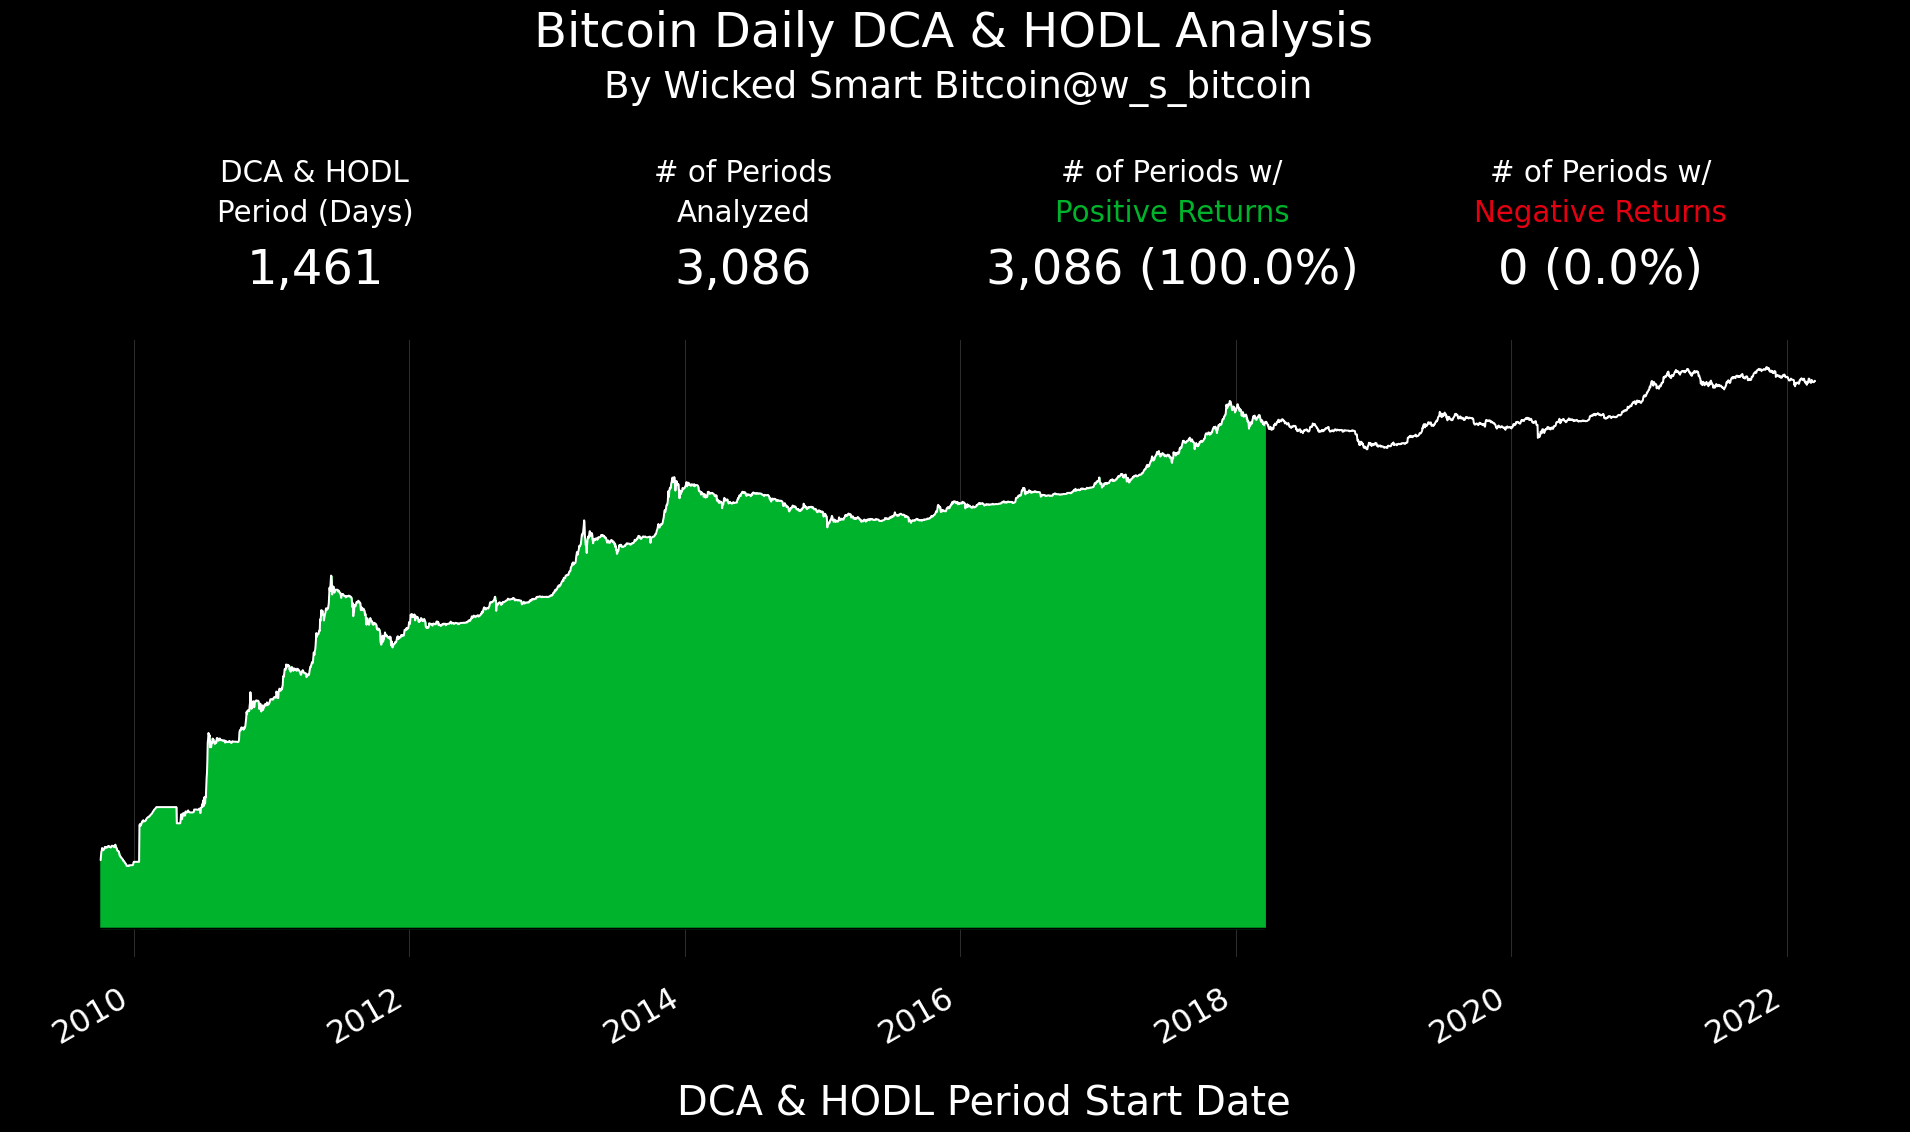

In [39]:
dca_and_hodl_analysis(hodl_days=1461)
# dca_and_hodl_analysis(hodl_days=1500)

<ipython-input-34-a40aa972b476>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax) = plt.subplots(1, 1, figsize=(size, size_y), dpi=96, facecolor='black')


<Figure size 432x288 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

<Figure size 1920x1200 with 0 Axes>

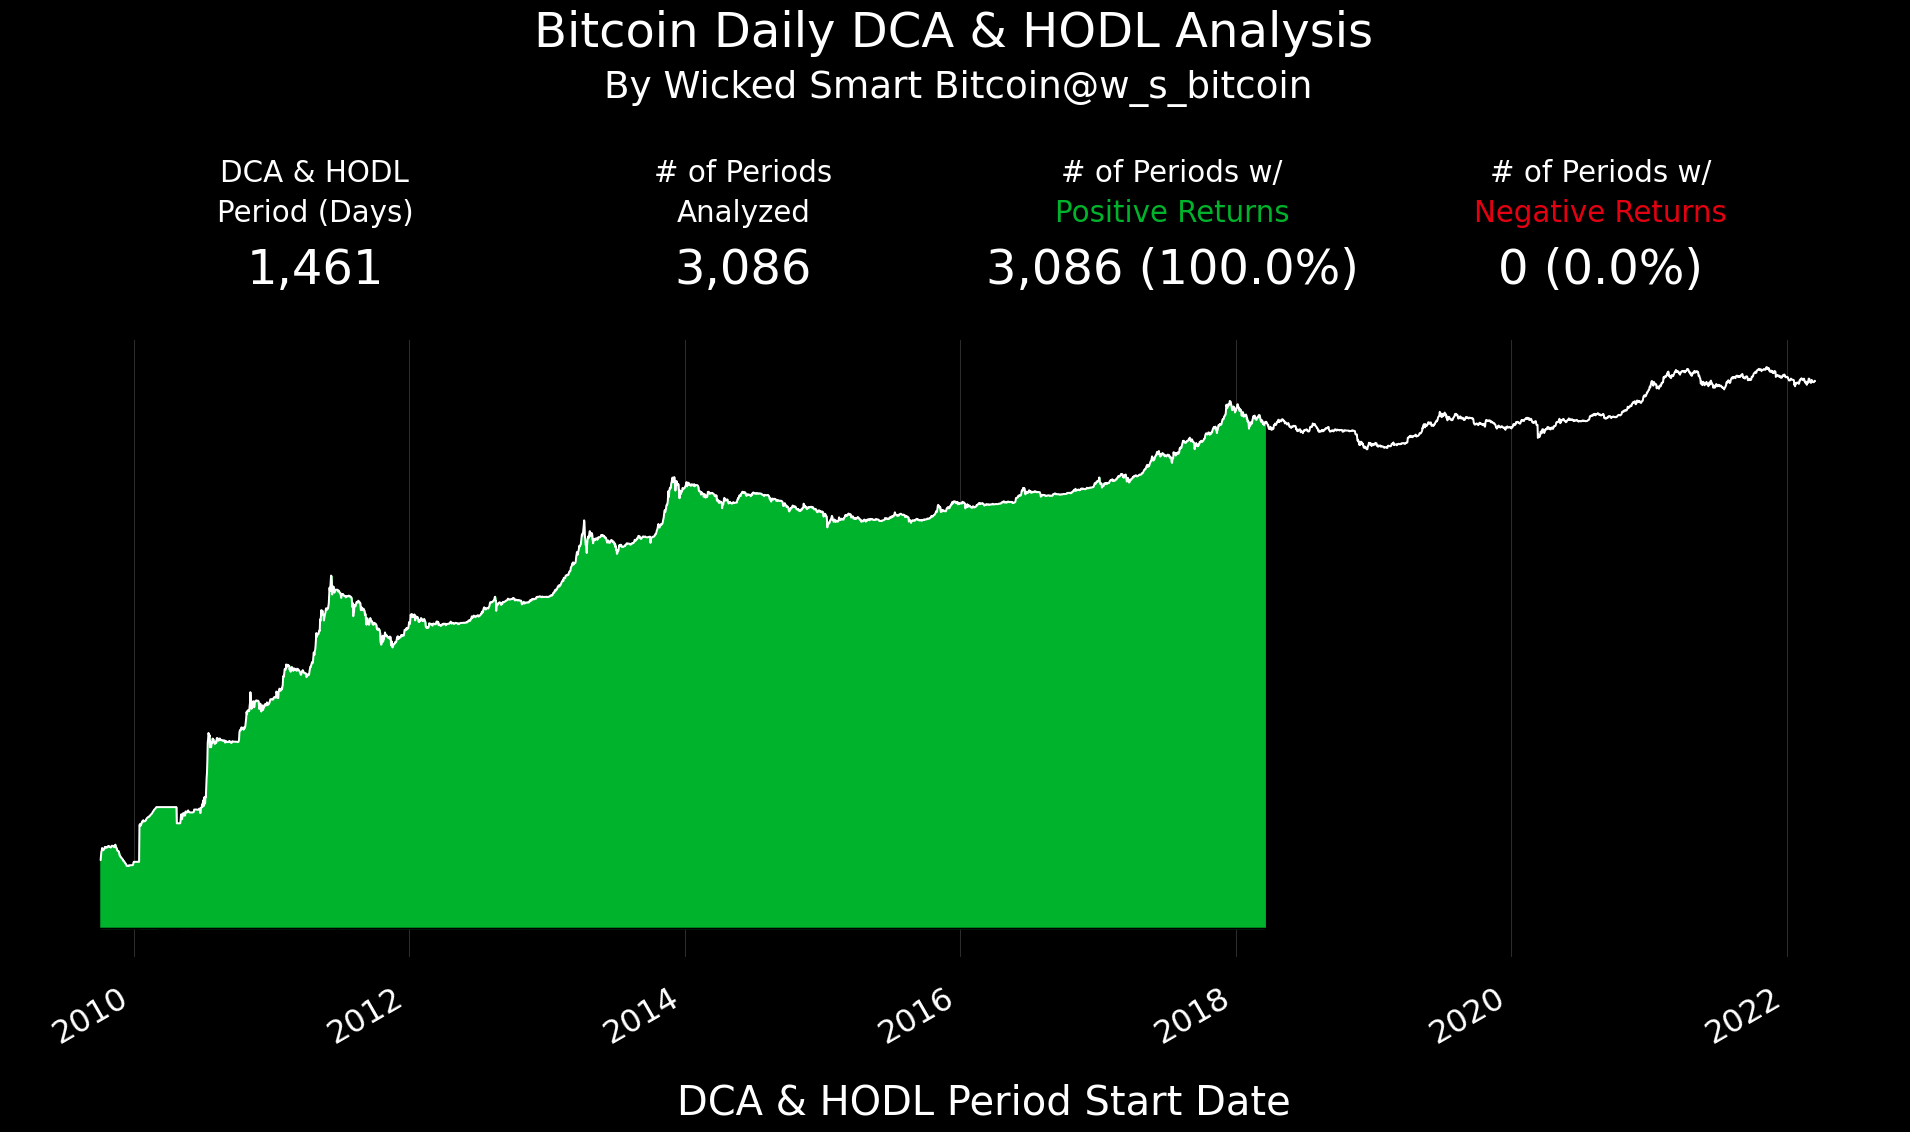

In [37]:
for i in range(1461):
    plt.clf()
    dca_and_hodl_analysis(hodl_days=i+1)

In [8]:
df[(df['1461_day_return'] < 0) & (df['1461_day_return'] > -50)]

,date,price,1_day_return,2_day_return,3_day_return,4_day_return,5_day_return,6_day_return,7_day_return,8_day_return,...,1817_day_return,1818_day_return,1819_day_return,1820_day_return,1821_day_return,1822_day_return,1823_day_return,1824_day_return,1825_day_return,1826_day_return
741,1/14/11,0.4000,-1.781170,-1.057299,-8.165276,-14.727837,-12.582042,7.552299,13.555541,17.522410,...,113.581968,112.073070,126.145724,123.570905,121.338856,121.103585,120.672273,112.911589,112.365637,111.101164
957,8/18/11,10.8300,3.647687,1.255415,0.001989,-2.964590,-2.145669,-2.535227,-11.795029,-23.130997,...,126.811398,124.405948,127.368005,124.771936,124.427366,123.913079,118.551731,116.790723,120.103368,118.241689
963,8/24/11,10.8506,-5.820281,-14.462300,-7.823549,-2.150719,-2.715836,-4.006545,-9.281385,-8.230674,...,117.863454,116.108347,119.410924,117.555457,117.702888,118.003208,120.532141,120.381849,121.767980,120.313805
2625,3/12/16,410.1320,0.262517,0.626983,0.522416,0.585506,0.929007,-1.360184,-1.089476,-0.488572,...,570.748183,541.468095,545.044442,544.512889,570.080111,586.361036,617.185704,627.183046,649.711285,639.685908
2627,3/14/16,415.0910,0.035161,0.162987,0.518203,-1.593419,-1.233613,-0.595647,-0.379096,0.846557,...,544.374106,543.843357,569.384278,585.648556,616.441491,626.428726,648.933866,638.919153,686.666865,655.743885
2629,3/16/16,416.2530,0.263446,-1.499347,-1.040478,-0.400434,-0.197984,0.972923,0.947503,0.187556,...,568.688750,584.936388,615.697603,625.674733,648.156783,638.152729,685.851189,654.960543,626.040925,648.858128
